In [1]:
import pandas as pd
import numpy as np
import matplotlib
import json
from pandas import json_normalize
from IPython.display import display

### Loading the data

In [2]:
data = pd.read_csv('../../data/healthtap_full_processed.csv')

In [3]:
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287925 entries, 0 to 2287924
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   doctor_name        object
 1   doctor_profession  object
 2   short_answer       object
 3   answer             object
 4   main_category      object
 5   question           object
 6   related_topics     object
 7   sub_category       object
dtypes: object(8)
memory usage: 139.6+ MB


### Main category

In [18]:
data['main_category'].describe()

count     2287925
unique        227
top         drugs
freq       120024
Name: main_category, dtype: object

In [5]:
data['main_category'].unique()

array(['vagina', 'video game', 'viral infection', 'vitamins', 'weigh',
       'weight gain', 'uterus', 'vaccines', 'weight loss', 'went er',
       'bumps', 'burn', 'burning sensation', 'cancer',
       'carbidopa levodopa', 'carpal tunnel', 'cesarean section',
       'charley horse', 'chest', 'chest pain', 'child',
       'chronic fatigue syndrome', 'chronic pain', 'cold', 'cold sore',
       'concussion', 'connective tissue', 'contact lens', 'contraception',
       'coumadin warfarin', 'cracking knuckle', 'creams', 'ct scan',
       'cure', 'cut', 'cysts', 'delay period', 'dementia', 'depression',
       'dextroamphetamine racemic amphetamine', 'diabetes',
       'diagnostic test', 'diets', 'disabilities', 'disorders', 'drugs',
       'dry skin', 'ear infection', 'effect', 'enema',
       'estoy experimentando', 'exercise', 'eye', 'eyes', 'face',
       'family', 'fear management', 'feet', 'fever', 'flu', 'food safety',
       'foot pain', 'fungal infection', 'gall bladder', 'gas blo

### Histogram of top categories (count more than 10 000)

<AxesSubplot:>

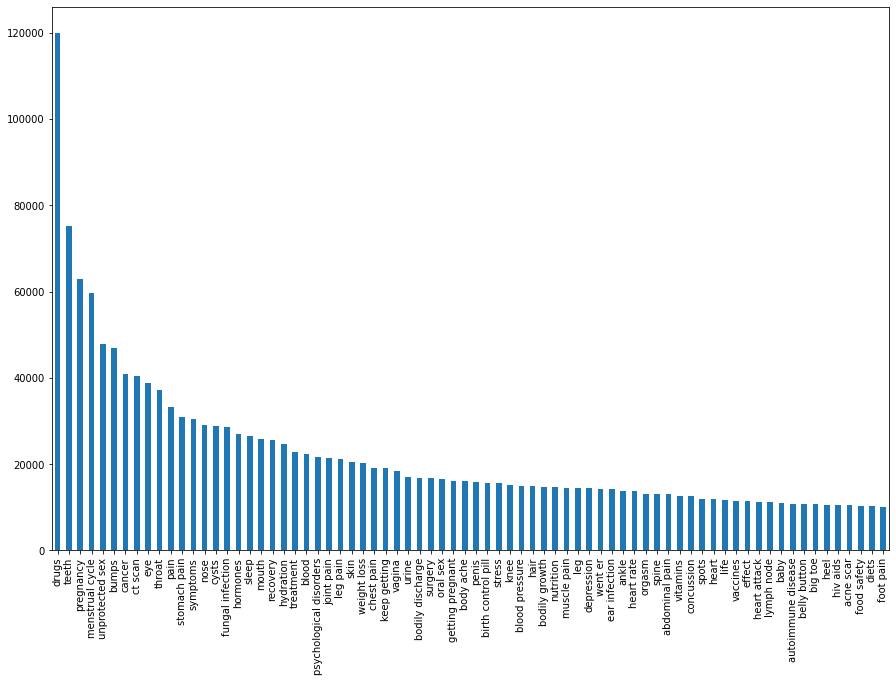

In [6]:
data['main_category'].value_counts().loc[lambda x: x > 10000].plot(kind="bar", figsize=(15,10))

### Other columns

In [7]:
data['doctor_name'].describe()

count              2287925
unique               40945
top       Dr. Heidi Fowler
freq                 72068
Name: doctor_name, dtype: object

In [8]:
data['doctor_profession'].describe()

count             2283931
unique              17431
top       Family Medicine
freq               224808
Name: doctor_profession, dtype: object

In [9]:
data['sub_category'].describe()

count                 2287925
unique                   5048
top       high blood pressure
freq                    12092
Name: sub_category, dtype: object

### Count number of words in questions and answers and assign it to new columns

In [10]:
data['question_len'] = data['question'].str.split().apply(len)
data['answer_len'] = data['answer'].str.split().apply(len)

In [11]:
pd.set_option('float_format', '{:f}'.format)
display(data['question_len'].describe())
display(data['answer_len'].describe())

count   2287925.000000
mean         18.562765
std           9.430023
min           1.000000
25%          10.000000
50%          17.000000
75%          26.000000
max          65.000000
Name: question_len, dtype: float64

count   2287925.000000
mean         40.386308
std          22.666927
min           1.000000
25%          22.000000
50%          39.000000
75%          58.000000
max        1819.000000
Name: answer_len, dtype: float64

### Question length diagram

<AxesSubplot:>

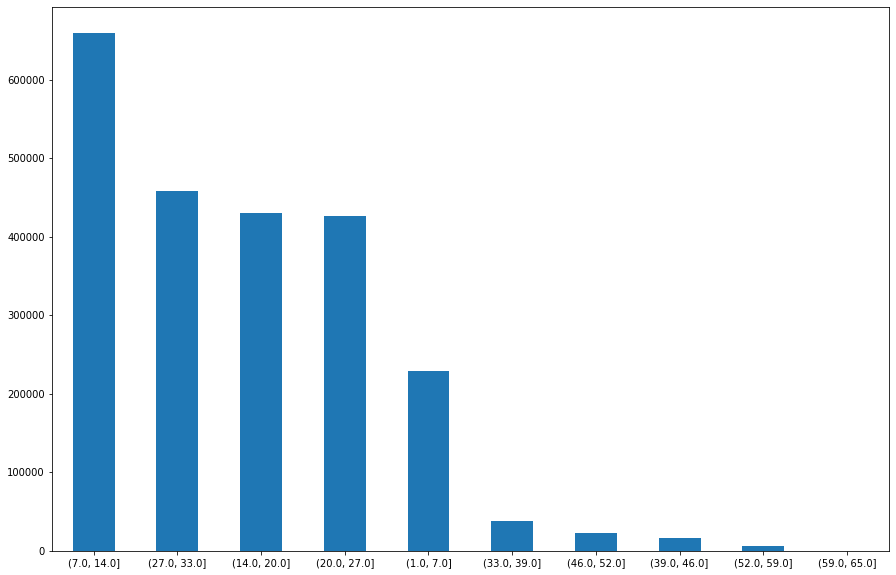

In [12]:
data['question_len_group'] = pd.cut(data['question_len'], bins=10, precision=0)
pd.value_counts(data['question_len_group']).plot(kind="bar", figsize=(15,10), rot=0)

### Answer length diagram
We can observe that most answers have less than 100 words. We adjust the bin intervals according to this.

<AxesSubplot:>

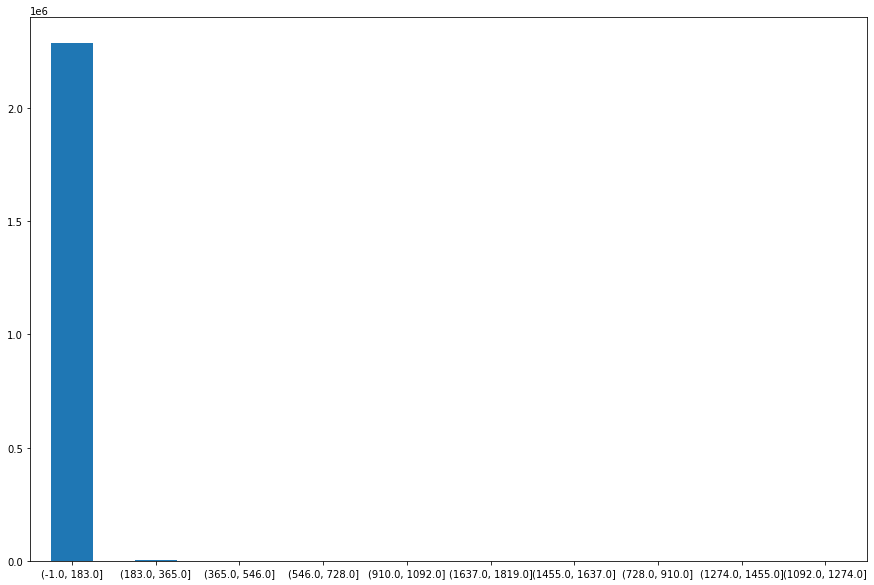

In [13]:
data['answer_len_group'] = pd.cut(data['answer_len'], bins=10, precision=0)
pd.value_counts(data['answer_len_group']).plot(kind="bar", figsize=(15,10), rot=0)

In [14]:
len(data[data['answer_len'] > 100])

9611

<AxesSubplot:>

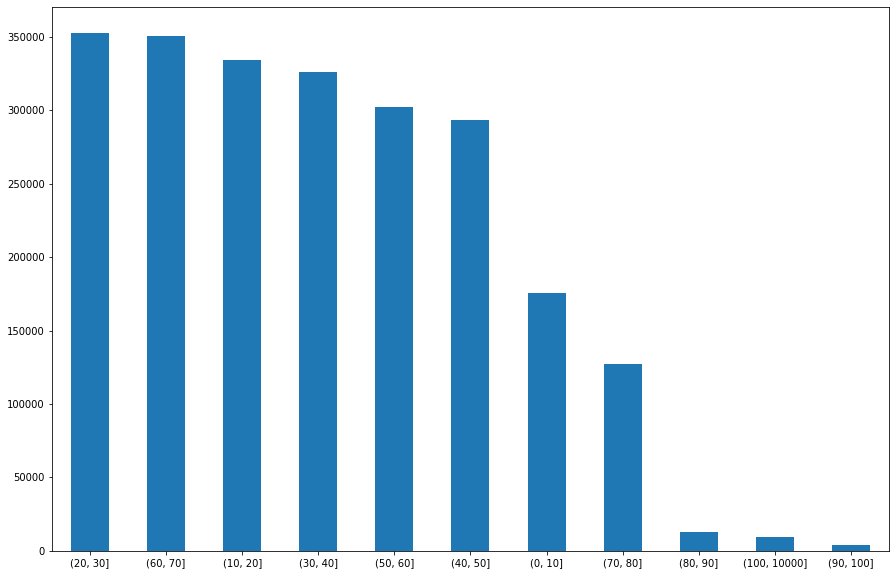

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10000]
data['answer_len_group'] = pd.cut(data['answer_len'], bins=bins, precision=0)
pd.value_counts(data['answer_len_group']).plot(kind="bar", figsize=(15,10), rot=0)

### Word frequency in questions and answers

<AxesSubplot:>

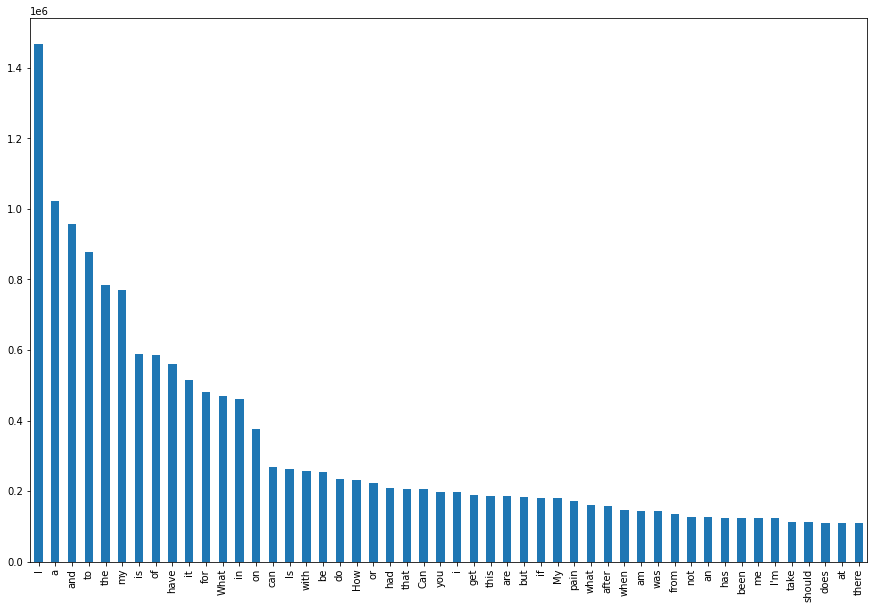

In [16]:
data.question.str.split(expand=True).stack().value_counts()[:50].plot(kind="bar", figsize=(15,10))

<AxesSubplot:>

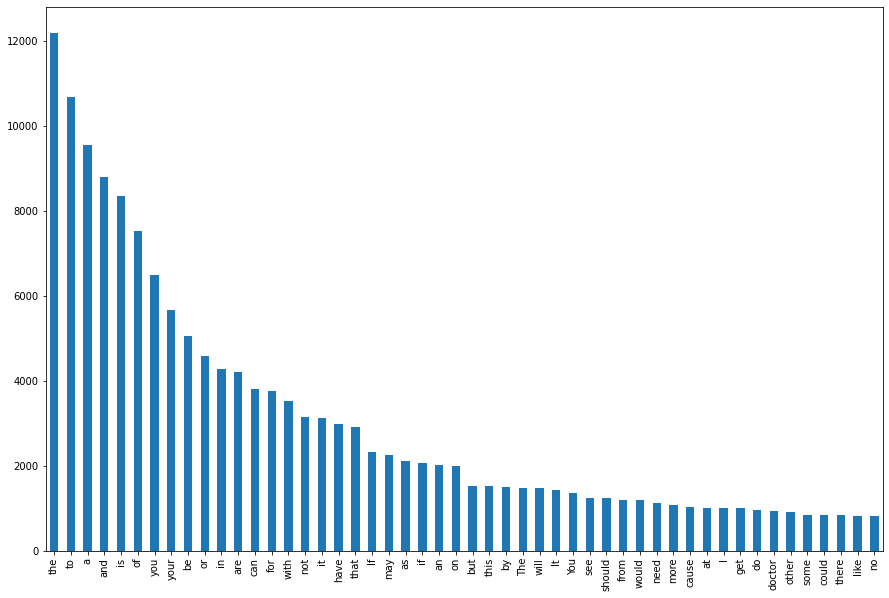

In [17]:
data.sample(n=10000).answer.str.split(expand=True).stack().value_counts()[:50].plot(kind="bar", figsize=(15,10))

In [24]:
pd.set_option('display.max_colwidth', None)
data.sample(n=50)[['question', 'answer']]

,question,answer
2156732,"17 Female, dry skin on nipples, no itching, bleed, discharge etc. Went away after moisturising. Should I be worried?","Sounds like you did the right thing. As long as there are no other symptoms, such as discharge, bleeding or pain would just observe"
1087579,I was 4-6 hours late on the 1st pill of my birth control pack. Then 1.5 hours late on the 13th pill of the pack. What should I do?,Use another method until you see your period on the top of taking bcp. If you miss your period take a pregnancy test.
1086557,If you have a tubal pregnancy can you hear the heartbeat?,"The fetus or the mother? Kindly see your doctor if this is what you feel,"
508407,What is the definition or description of: Piroxicam allergy?,"Depends. An allergy to any medicine can take many forms. Most people would say a typical allergy would be a rash. More severe allergies could be trouble breathing, facial swelling, eye swelling. Allergies and side effects could be the same such as stomach pain diarrhea headaches. If you start a medicine and develop any new symptoms seek attention from your medical provider or emergency room. Good luck."
1481041,I had amlodopine 5 mg after IVF for 5 day and then stop them. Find info so they danger for babe? Did this 5 day while I take this med will affect babe?,Not likely. There are no safe drugs in pregnancy but the effect of all drugs prior to a positive pregnancy test is minimal. The embryo is barely implanted at that point and has the potential for recovering from small injuries.
51373,"My son is 3,7 y o and has no vaccination at all. Whom should I consult to vaccine him properly? Do I need some plan or schedule? What are the vaccines nececcary for him? can I do it myself?",go to your local health department. They will have an immunization schedule to follow depending on the age of your child. You cannot do this yourself. You can check the CDC site in Atlanta for guidance. Thanks for immunizing your children. All the best.
1691030,What does it mean when you have brown circles around your iris?,"Many people of african american heritage have excess melanin pigment just next to the cornea which can appear as a brown ring around the cornea. Not a cause for alarm, but to be safe, check with an eye md."
943777,How much is rhe recovery time for hystorectomy?,"Depends. It really depends on what type of hysterectomy you are having. In our practice, women who undergo a laparoscopic hysterectomy go home the same day and are back to work in 4-7 days! don't let your physician tell you your uterus is too large to remove laparoscopically. We have done almost a 1000 laparoscopic hysterectomies as an outpatient, many for large fibroid uterus. www.dradler.com. Good luck!"
2179520,Is the female g spot similar to the male prostate?,Mystery of sex. No. And yes. Each woman has their own mysteries to teach you. Please learn to treat them with respect and dignity. Including on public boards when asking about their sexual anatomy.
672037,Can I bring an infant seat on an airplane?,"Yes. You can bring your child's car seat on the airplane, but you will need to purchase a ticket for your child. Some car seats are suitable for airplane use, some are not. Check with the manufacturer for details. If you choose not to purchase a seat for your infant, remember to bring the car seat as luggage. You will want to have your car seat handy at your destination!"
